In [2]:
!pip install pandas


In [3]:
import pandas as pd

file_path = 'downloads/archive/marketing_campaign.csv'  # Path to your CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.head()




FileNotFoundError: [Errno 2] No such file or directory: 'downloads/archive/marketing_campaign.csv'

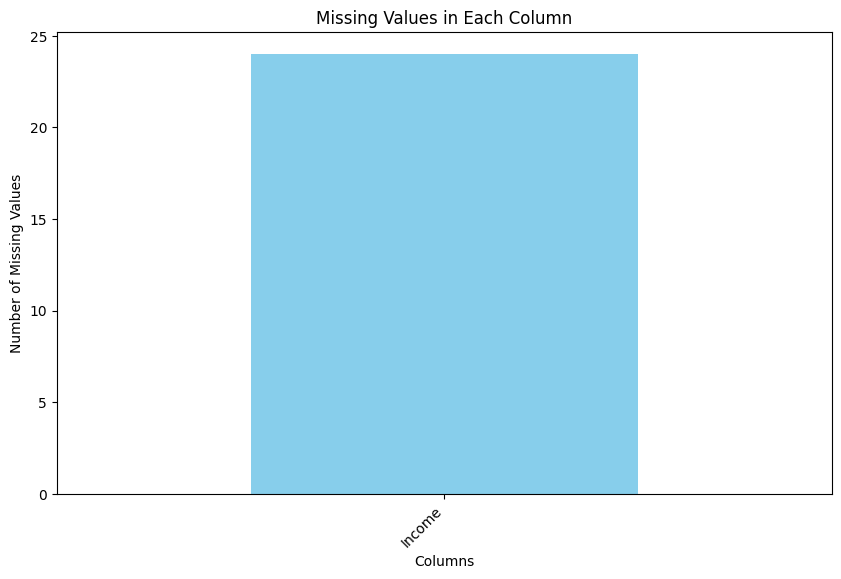

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/Users/jorgemartinez/Documents/NYDSA #1 Python Project /marketing_campaign.csv'  
df = pd.read_csv(file_path)

# Calculate the number of missing values per column
missing_values = df.isnull().sum()

# Filter out columns with no missing values
missing_values = missing_values[missing_values > 0]

# Check if there are any missing values to plot
if not missing_values.empty:
    # Plot the missing values as a bar graph
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar', color='skyblue')
    plt.title('Missing Values in Each Column')
    plt.xlabel('Columns')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No missing values found in the dataset.")


In [6]:
print(missing_values)

Income    24
dtype: int64


In [12]:
# Install missingno if you haven't already
!pip install missingno

# Now, import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Continue with the rest of your code


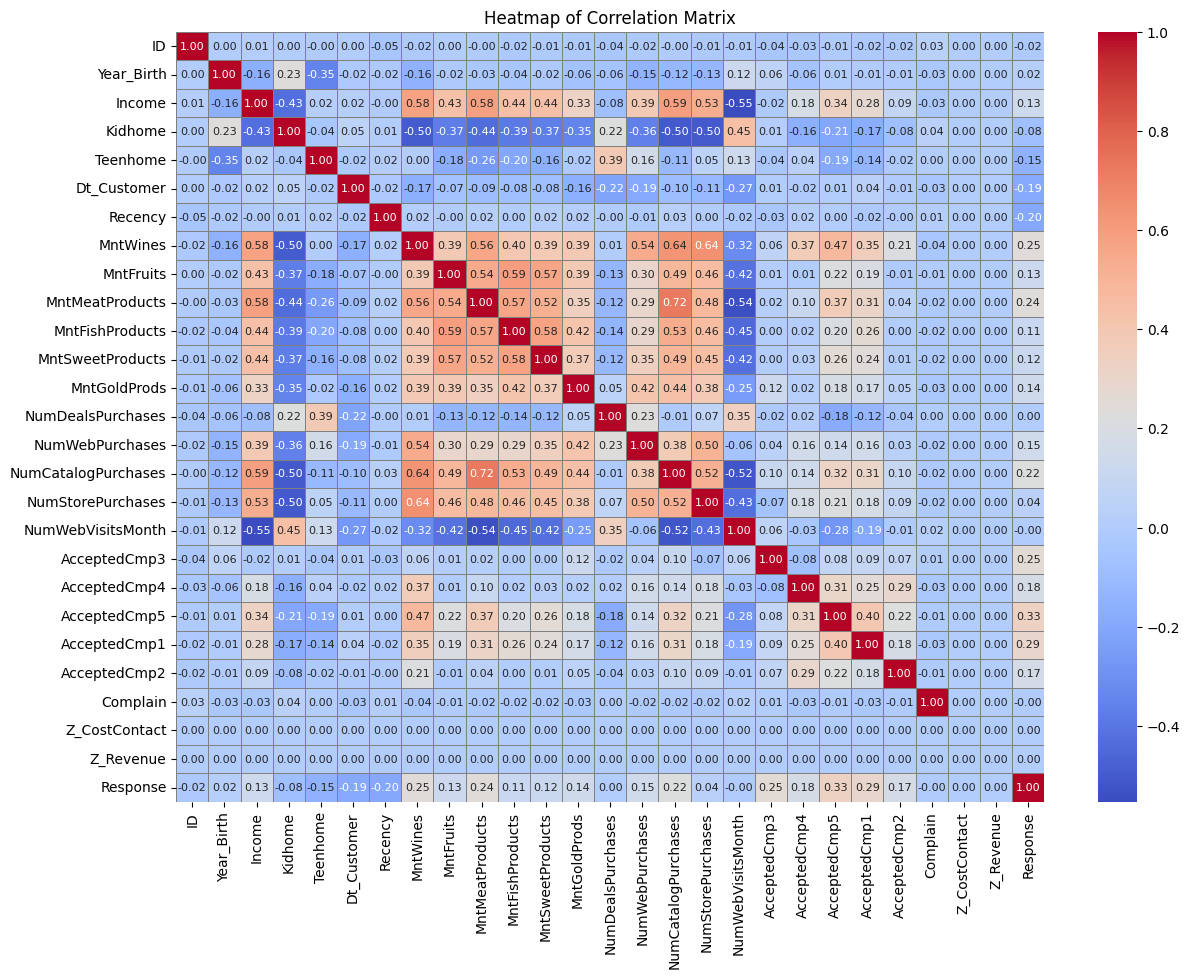

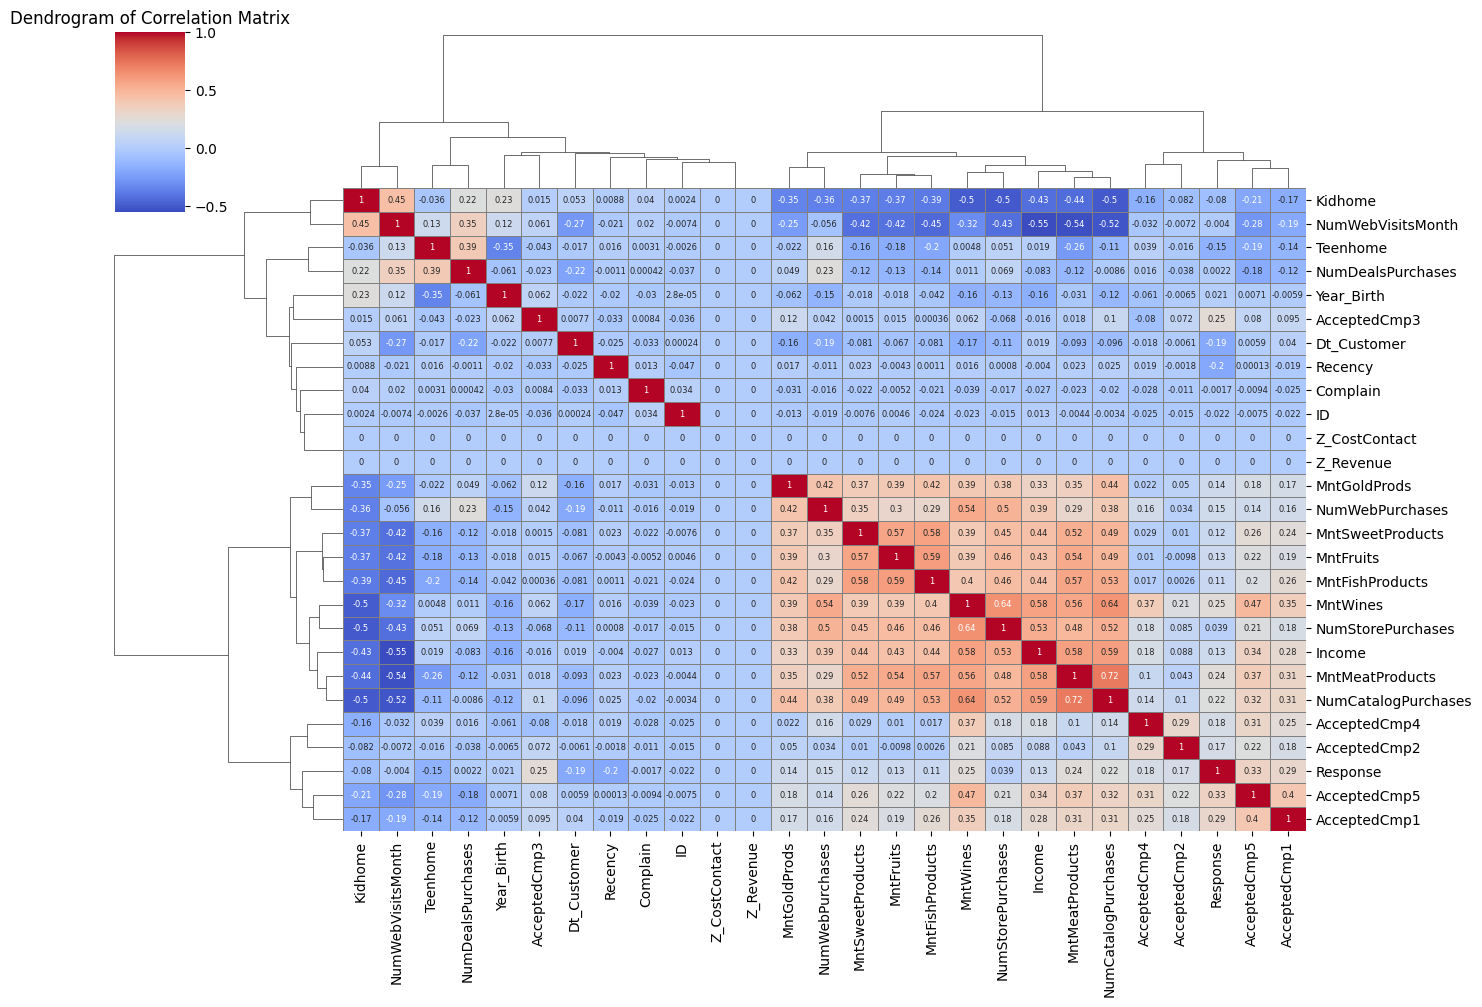

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.cluster import hierarchy

# Load the correctly parsed dataset
file_path = '/Users/jorgemartinez/Documents/NYDSA #1 Python Project /marketing_campaign.csv'
df = pd.read_csv(file_path, sep=',')  # Correct delimiter is comma

# Plot Correlation Heatmap
def plot_correlation_heatmap(df):
    """
    Plots a heatmap showing the correlation between numeric variables in the DataFrame.
    """
    numeric_df = df.select_dtypes(include=['number'])

    corr = numeric_df.corr()
    corr = corr.replace([np.inf, -np.inf], np.nan).fillna(0)

    plt.figure(figsize=(14, 10))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, 
                annot_kws={"size": 8}, linewidths=0.5, linecolor='gray')
    plt.title('Heatmap of Correlation Matrix')
    plt.show()

plot_correlation_heatmap(df)

# Plot Correlation Dendrogram
def plot_correlation_dendrogram(df):
    """
    Plots a dendrogram showing the correlation between numeric variables in the DataFrame.
    """
    numeric_df = df.select_dtypes(include=['number'])

    corr = numeric_df.corr()
    corr = corr.replace([np.inf, -np.inf], np.nan).fillna(0)

    try:
        sns.clustermap(corr, method='ward', cmap='coolwarm', annot=True, 
                       figsize=(14, 10), annot_kws={"size": 6}, 
                       linewidths=0.5, linecolor='gray')
        plt.title('Dendrogram of Correlation Matrix')
        plt.show()
    except ValueError as e:
        print(f"An error occurred while plotting the dendrogram: {e}")

plot_correlation_dendrogram(df)


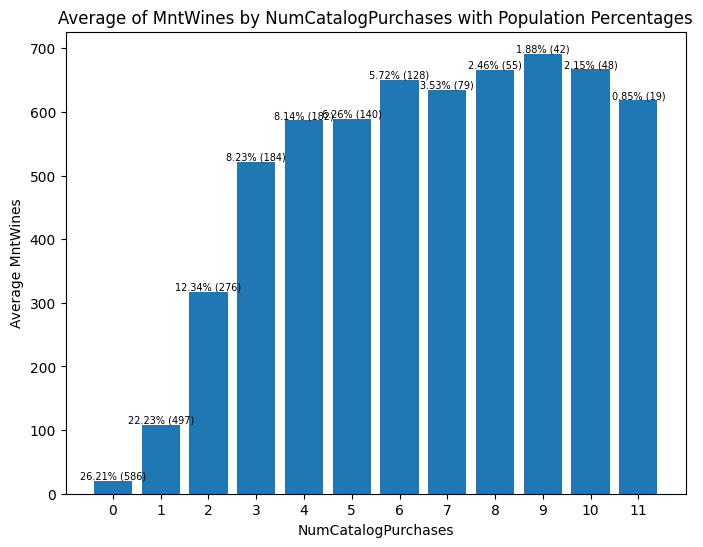

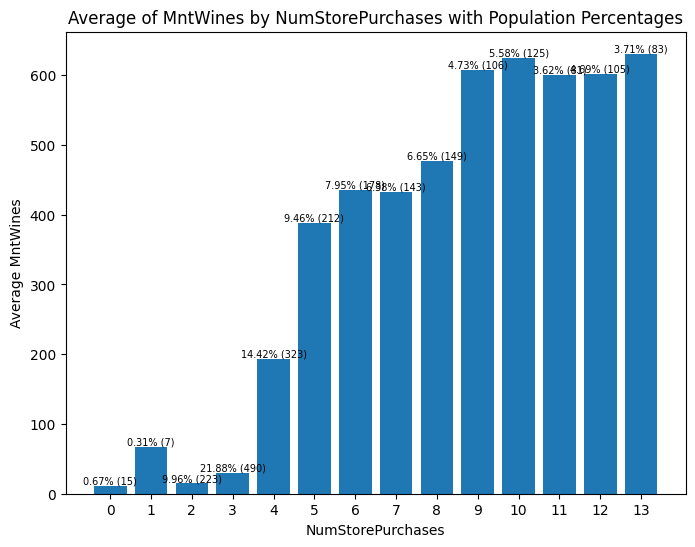

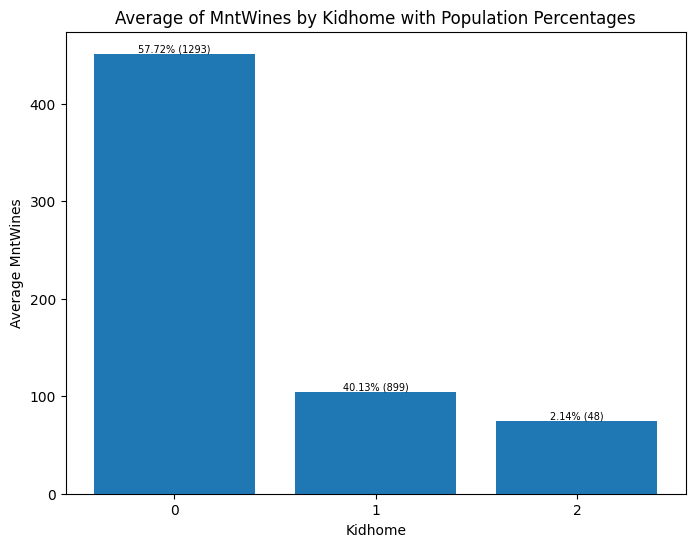

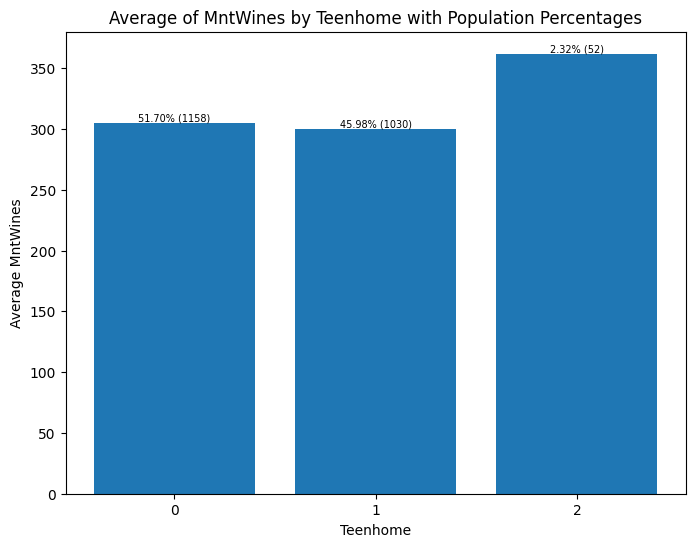

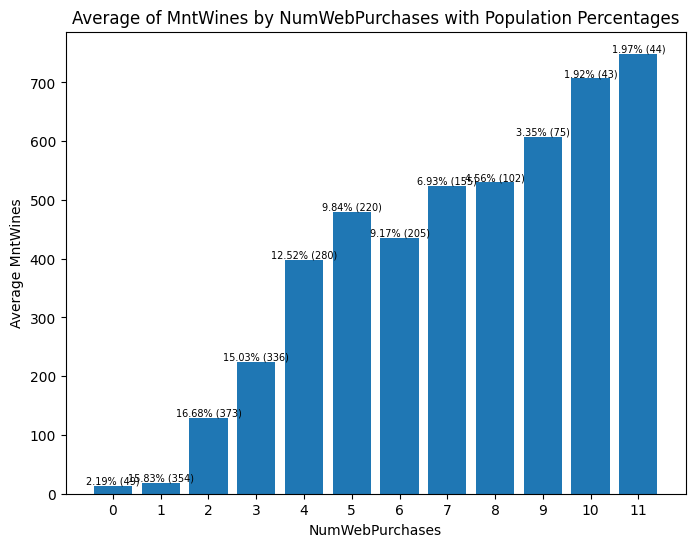

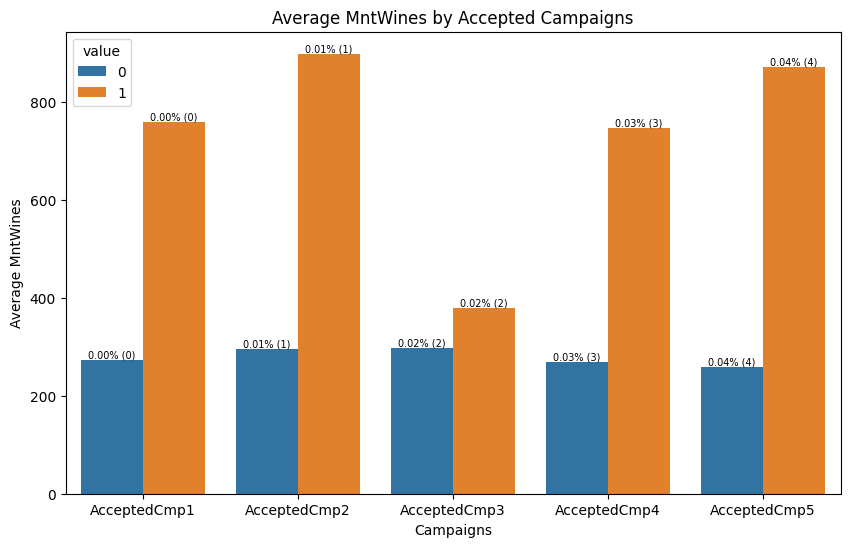

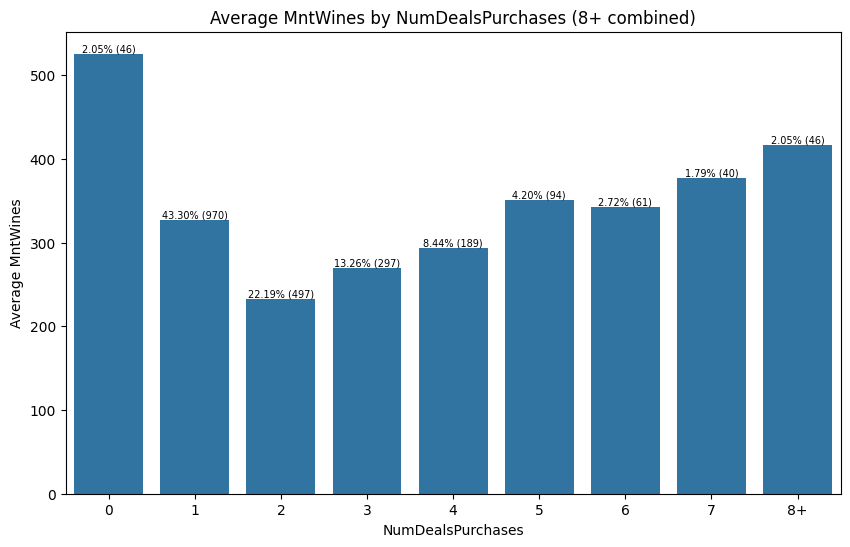

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """
    Load the CSV file into a DataFrame.
    
    Parameters:
    file_path (str): The path to the CSV file.

    Returns:
    pd.DataFrame: The loaded DataFrame.
    """
    return pd.read_csv(file_path, sep=',')

def plot_bar_with_averages(df, var1, var2, exclusions=None):
    """
    Create a bar graph with averages for a variable pair, with optional exclusions.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    var1 (str): The y-axis variable.
    var2 (str): The x-axis variable.
    exclusions (list): List of values to exclude from the x-axis variable.
    
    Returns:
    None: Displays the bar graph.
    """
    if exclusions:
        df = df[~df[var2].isin(exclusions)]

    averages = df.groupby(var2)[var1].mean()
    counts = df[var2].value_counts()
    percentages = counts / len(df) * 100

    plt.figure(figsize=(8, 6))
    bars = plt.bar(averages.index.astype(str), averages.values)

    for bar, category in zip(bars, averages.index):
        height = bar.get_height()
        percentage = percentages.loc[category]
        count = counts.loc[category]
        plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{percentage:.2f}% ({count})', 
                 ha='center', va='bottom', fontsize=7)

    plt.title(f'Average of {var1} by {var2} with Population Percentages')
    plt.xlabel(var2)
    plt.ylabel(f'Average {var1}')
    plt.show()

def create_grouped_bar_graph(df):
    """
    Create a grouped bar graph for Average of MntWines by AcceptedCmp1, AcceptedCmp2, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5.
    """
    melted_df = pd.melt(df, id_vars=['MntWines'], value_vars=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5'])
    grouped = melted_df.groupby(['variable', 'value'])['MntWines'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    bars = sns.barplot(data=grouped, x='variable', y='MntWines', hue='value')

    total_counts = melted_df.groupby(['variable', 'value']).size().reset_index(name='counts')
    total_population = len(melted_df)

    for container in bars.containers:
        for bar, (count, _) in zip(container, total_counts.iterrows()):
            height = bar.get_height()
            percentage = (count / total_population) * 100
            bars.text(bar.get_x() + bar.get_width() / 2.0, height, f'{percentage:.2f}% ({count})', 
                      ha='center', va='bottom', fontsize=7)

    plt.title('Average MntWines by Accepted Campaigns')
    plt.ylabel('Average MntWines')
    plt.xlabel('Campaigns')
    plt.show()

def combine_bars_for_numdeals(df):
    """
    Combine bars for NumDealsPurchases 8 and above into one bar called 8+.
    """
    df['NumDealsPurchases'] = df['NumDealsPurchases'].apply(lambda x: '8+' if x >= 8 else str(x))
    combined = df.groupby('NumDealsPurchases')['MntWines'].mean().reset_index()

    plt.figure(figsize=(10, 6))
    bars = sns.barplot(data=combined, x='NumDealsPurchases', y='MntWines')

    counts = df['NumDealsPurchases'].value_counts()
    percentages = counts / len(df) * 100

    for bar, category in zip(bars.patches, combined['NumDealsPurchases']):
        height = bar.get_height()
        percentage = percentages.loc[category]
        count = counts.loc[category]
        bars.text(bar.get_x() + bar.get_width() / 2.0, height, f'{percentage:.2f}% ({count})', 
                  ha='center', va='bottom', fontsize=7)

    plt.title('Average MntWines by NumDealsPurchases (8+ combined)')
    plt.ylabel('Average MntWines')
    plt.xlabel('NumDealsPurchases')
    plt.show()

# Main execution
file_path = '/Users/jorgemartinez/Documents/NYDSA #1 Python Project /marketing_campaign.csv'
df = load_data(file_path)

# List of variable pairs to plot
variable_pairs = [
    ("MntWines", "NumCatalogPurchases", [22, 28]),
    ("MntWines", "NumStorePurchases", None),
    ("MntWines", "Kidhome", None),
    ("MntWines", "Teenhome", None),
    ("MntWines", "NumWebPurchases", [23, 25, 27])
]

# Plot the bar graphs with averages and annotations
for var1, var2, exclusions in variable_pairs:
    plot_bar_with_averages(df, var1, var2, exclusions)

# Create grouped bar graph with AcceptedCmp4 included
create_grouped_bar_graph(df)

# Combine bars for NumDealsPurchases
combine_bars_for_numdeals(df)


<Figure size 800x600 with 0 Axes>

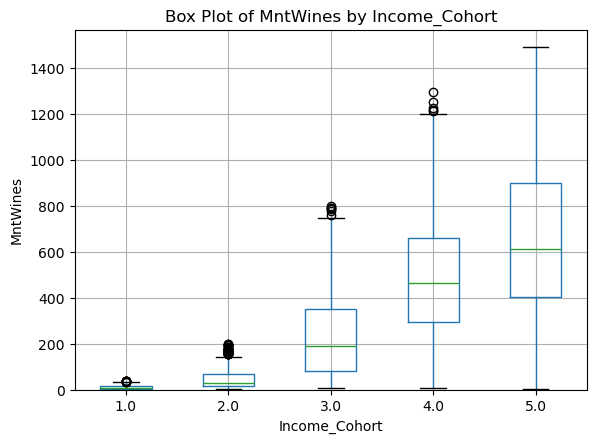

<Figure size 800x600 with 0 Axes>

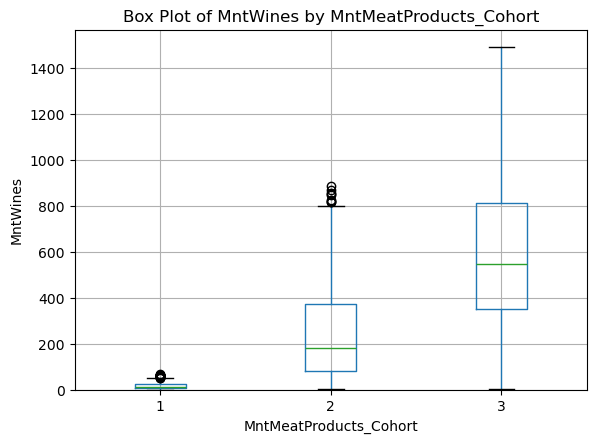

<Figure size 800x600 with 0 Axes>

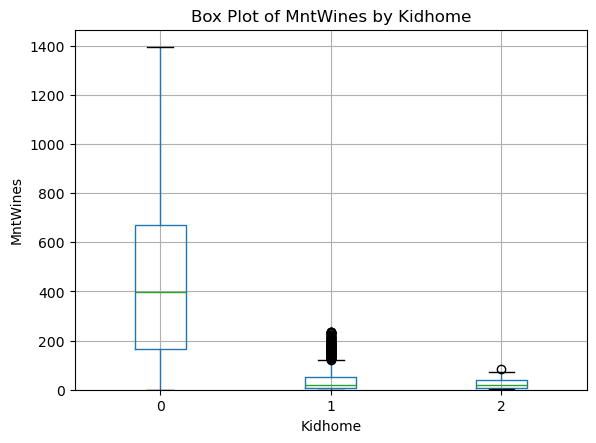

<Figure size 800x600 with 0 Axes>

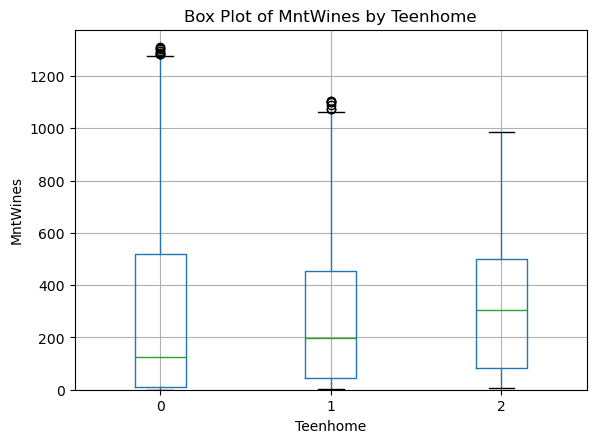

<Figure size 800x600 with 0 Axes>

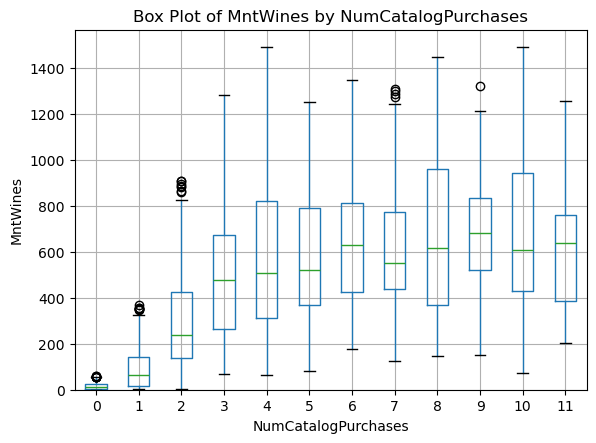

<Figure size 800x600 with 0 Axes>

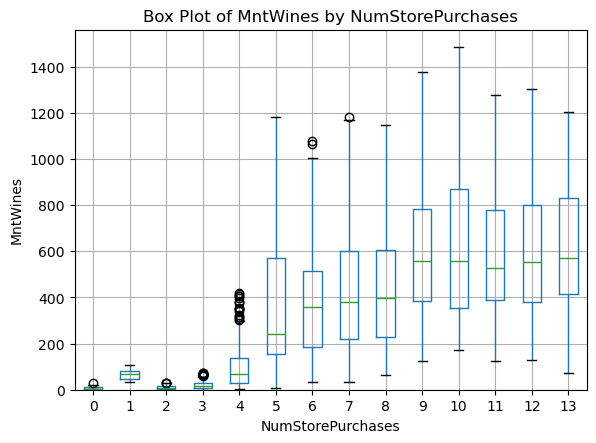

<Figure size 800x600 with 0 Axes>

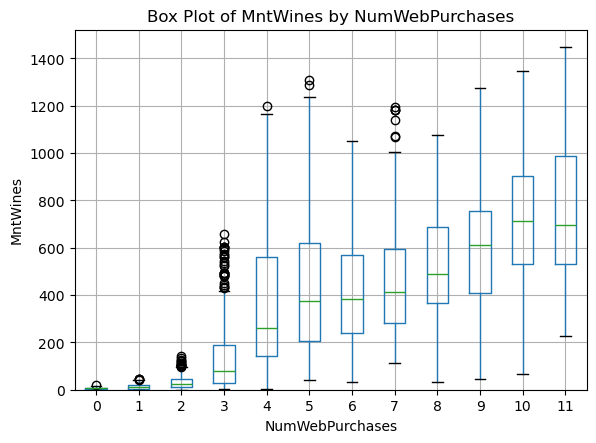

<Figure size 800x600 with 0 Axes>

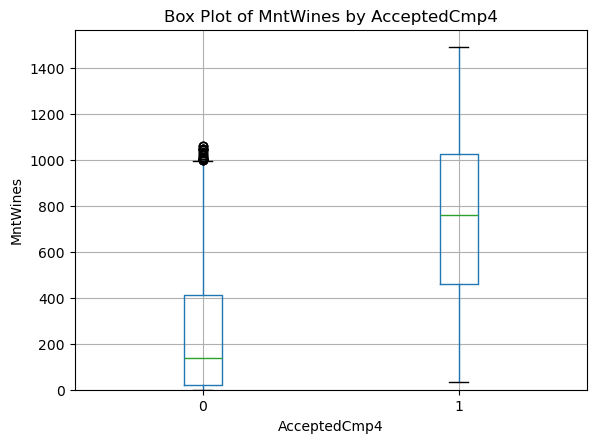

<Figure size 800x600 with 0 Axes>

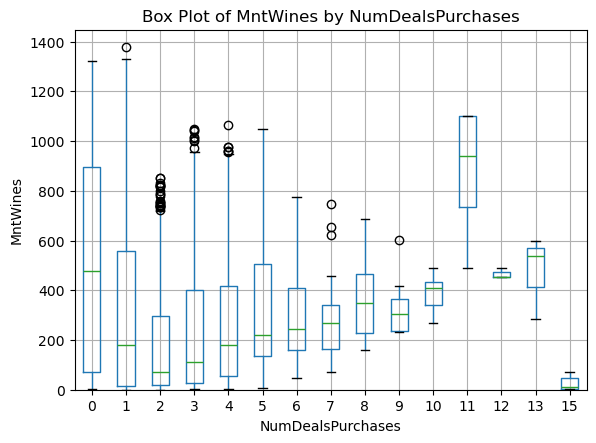